# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [697]:
# path = 'C:/Users/User/mini_project_2/day2/data1.pkl'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [698]:
# from google.colab import drive
# drive.mount('/content/drive')

In [699]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [700]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [701]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [702]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = joblib.load('./data1.pkl')


In [703]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.head()


,Date,drive,reservation,ride,waiting_avg,price_avg,distance_avg,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,weekly_waiting,ride_percentage
6,2015-01-07,410,4085,3676,24.7,2230,8646,4.1,-7.4,3.4,98.0,29.0,10.47,Wednesday,1,Winter,2015,0.0,23.657143,0.899878
7,2015-01-08,419,4030,3728,21.2,2231,8683,-1.0,-8.8,0.0,42.0,24.0,10.12,Thursday,1,Winter,2015,0.0,23.371429,0.925062
8,2015-01-09,424,4167,3813,21.8,2215,8506,-0.2,-9.2,0.0,62.0,27.0,10.09,Friday,1,Winter,2015,0.0,24.028571,0.915047
9,2015-01-10,215,1916,1645,41.2,2447,11123,3.2,-6.8,0.0,78.0,38.0,8.74,Saturday,1,Winter,2015,0.0,26.171429,0.858559
10,2015-01-11,187,1700,1572,28.8,2419,10806,4.3,-5.5,0.0,81.0,33.0,9.41,Sunday,1,Winter,2015,0.0,26.785714,0.924706


In [704]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.tail()


,Date,drive,reservation,ride,waiting_avg,price_avg,distance_avg,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,weekly_waiting,ride_percentage
2918,2022-12-27,669,5635,4654,44.4,2198,8178,1.5,-7.9,0.0,85.0,46.0,8.27,Tuesday,12,Winter,2022,0.0,42.771429,0.825909
2919,2022-12-28,607,5654,4648,44.8,2161,7882,3.0,-7.3,0.0,86.0,51.0,10.25,Wednesday,12,Winter,2022,0.0,43.514286,0.822073
2920,2022-12-29,581,5250,4247,52.5,2229,8433,-0.3,-5.4,0.1,92.0,40.0,10.86,Thursday,12,Winter,2022,0.0,42.957143,0.808952
2921,2022-12-30,600,5293,4200,38.3,2183,8155,1.7,-7.8,0.0,71.0,34.0,10.88,Friday,12,Winter,2022,0.0,41.042857,0.793501
2922,2022-12-31,263,2167,1806,33.7,2318,9435,2.1,-4.0,0.0,87.0,38.0,10.84,Saturday,12,Winter,2022,0.0,41.657143,0.833410


In [705]:
# data.loc[data['season'] == 'Spring']

In [706]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2917 entries, 6 to 2922
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2917 non-null   datetime64[ns]
 1   drive            2917 non-null   int64         
 2   reservation      2917 non-null   int64         
 3   ride             2917 non-null   int64         
 4   waiting_avg      2917 non-null   float64       
 5   price_avg        2917 non-null   int64         
 6   distance_avg     2917 non-null   int64         
 7   temp_max         2917 non-null   float64       
 8   temp_min         2917 non-null   float64       
 9   rain(mm)         2917 non-null   float64       
 10  humidity_max(%)  2917 non-null   float64       
 11  humidity_min(%)  2917 non-null   float64       
 12  sunshine(MJ/m2)  2917 non-null   float64       
 13  weekday          2917 non-null   category      
 14  month            2917 non-null   int32       

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [707]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.isna().sum()


Date               0
drive              0
reservation        0
ride               0
waiting_avg        0
price_avg          0
distance_avg       0
temp_max           0
temp_min           0
rain(mm)           0
humidity_max(%)    0
humidity_min(%)    0
sunshine(MJ/m2)    0
weekday            0
month              0
season             0
year               0
holiday            0
weekly_waiting     0
ride_percentage    0
dtype: int64

In [708]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

pd.set_option('display.max_columns', None)

In [709]:
drop_col = ['drive', 'reservation', 'ride', 'price_avg', 'distance_avg', 'weekday', 'month', 'year', 'holiday']
data.drop(columns=drop_col, inplace=True)

### (2) 가변수화

In [710]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# dumm_cols = ['weekday', 'season']
dumm_cols = ['season']
data = pd.get_dummies(data, columns=dumm_cols, dtype=int)

data.head()

,Date,waiting_avg,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekly_waiting,ride_percentage,season_Spring,season_Summer,season_Fall,season_Winter
6,2015-01-07,24.7,4.1,-7.4,3.4,98.0,29.0,10.47,23.657143,0.899878,0,0,0,1
7,2015-01-08,21.2,-1.0,-8.8,0.0,42.0,24.0,10.12,23.371429,0.925062,0,0,0,1
8,2015-01-09,21.8,-0.2,-9.2,0.0,62.0,27.0,10.09,24.028571,0.915047,0,0,0,1
9,2015-01-10,41.2,3.2,-6.8,0.0,78.0,38.0,8.74,26.171429,0.858559,0,0,0,1
10,2015-01-11,28.8,4.3,-5.5,0.0,81.0,33.0,9.41,26.785714,0.924706,0,0,0,1


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [711]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# train_data = data.loc[data['Date'] < '2022-10-01']
# test_data = data.loc[data['Date'] >= '2022-10-01']

In [712]:
# test_data.tail()

In [713]:
data = data.set_index(['Date'])

In [714]:
data.head()

,waiting_avg,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekly_waiting,ride_percentage,season_Spring,season_Summer,season_Fall,season_Winter
Date,,,,,,,,,,,,,
2015-01-07,24.7,4.1,-7.4,3.4,98.0,29.0,10.47,23.657143,0.899878,0,0,0,1
2015-01-08,21.2,-1.0,-8.8,0.0,42.0,24.0,10.12,23.371429,0.925062,0,0,0,1
2015-01-09,21.8,-0.2,-9.2,0.0,62.0,27.0,10.09,24.028571,0.915047,0,0,0,1
2015-01-10,41.2,3.2,-6.8,0.0,78.0,38.0,8.74,26.171429,0.858559,0,0,0,1
2015-01-11,28.8,4.3,-5.5,0.0,81.0,33.0,9.41,26.785714,0.924706,0,0,0,1


#### 1) x, y 나누기

In [715]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# x와 y 분리
target = 'waiting_avg'
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [716]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=91, shuffle=False)
x_validation_train, x_validation_test, y_validation_train, y_validation_test = train_test_split(x, y, test_size=91, shuffle=False)


### (4) Scaling
* KNN, SVM 알고리즘을 적용하기 위해서는 스케일링을 해야 합니다.

In [717]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# MinMaxScaler()

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [718]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
def evaluation(y_test, y_pred):
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

In [719]:
def GridSearch(model_knn, x_train, y_train, params):
    model = GridSearchCV(model_knn,            # 기본 모델 이름
                         params,               # 앞에서 선언한 튜닝용 파라미터 변수
                         cv=5,                 # k-fold Cross Validation(default=5)
                         scoring='accuracy')   # 평가 방법
    
    model.fit(x_train, y_train)
    print(model.cv_results_['mean_test_score'])
    print(model.best_params_)
    print(model.best_score_)

In [720]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.ylim(0,60)
    plt.grid()
    plt.show()

### (1) 머신러닝

#### 1) 모델1

In [721]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model1 = Lasso()
model1.fit(x_train, y_train)

Lasso()

In [722]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
y_pred = model1.predict(x_test)
evaluation(y_test, y_pred)

MAE:  4.760521889829027
MAPE:  0.11593702962028488


In [723]:
# GridSearch(model1, x_train, y_train)

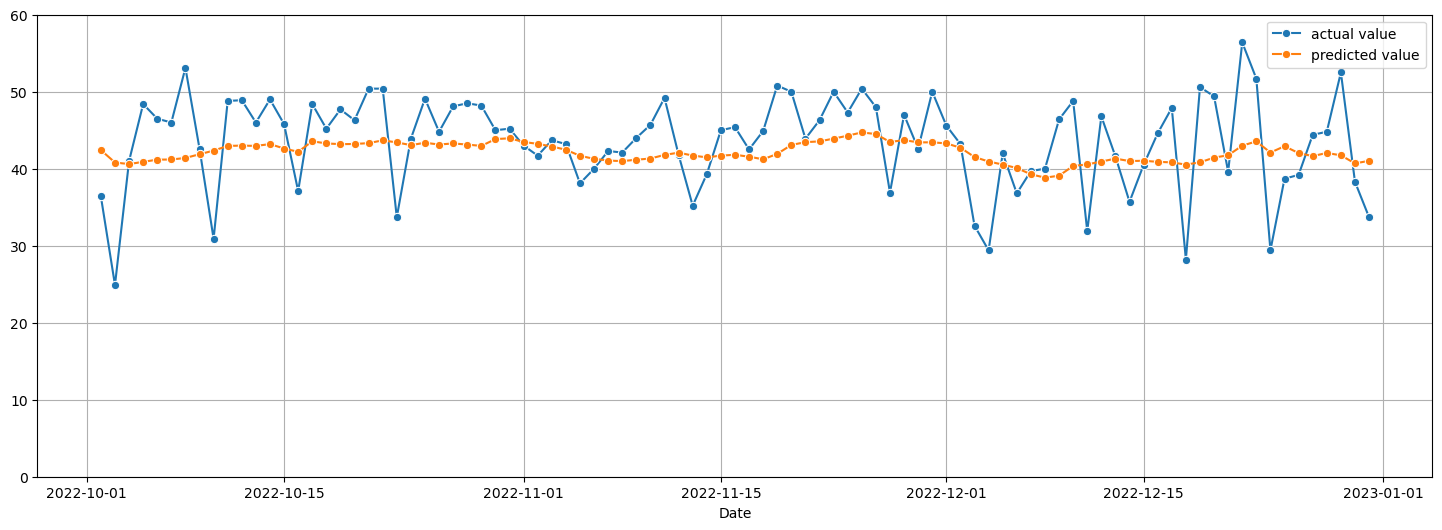

In [724]:
pred_plot(y_test, y_pred, y_test.index)

In [725]:
result = {}
result['Lasso'] = mean_absolute_percentage_error(y_test, y_pred)

In [726]:
result_r2 = {}
result_r2['Lasso'] = r2_score(y_test, y_pred)

#### 2) 모델2

In [727]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model2 = Ridge()
model2.fit(x_train, y_train)

Ridge()

In [728]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
y_pred = model2.predict(x_test)
evaluation(y_test, y_pred)

MAE:  3.610301236422795
MAPE:  0.09350906878264942


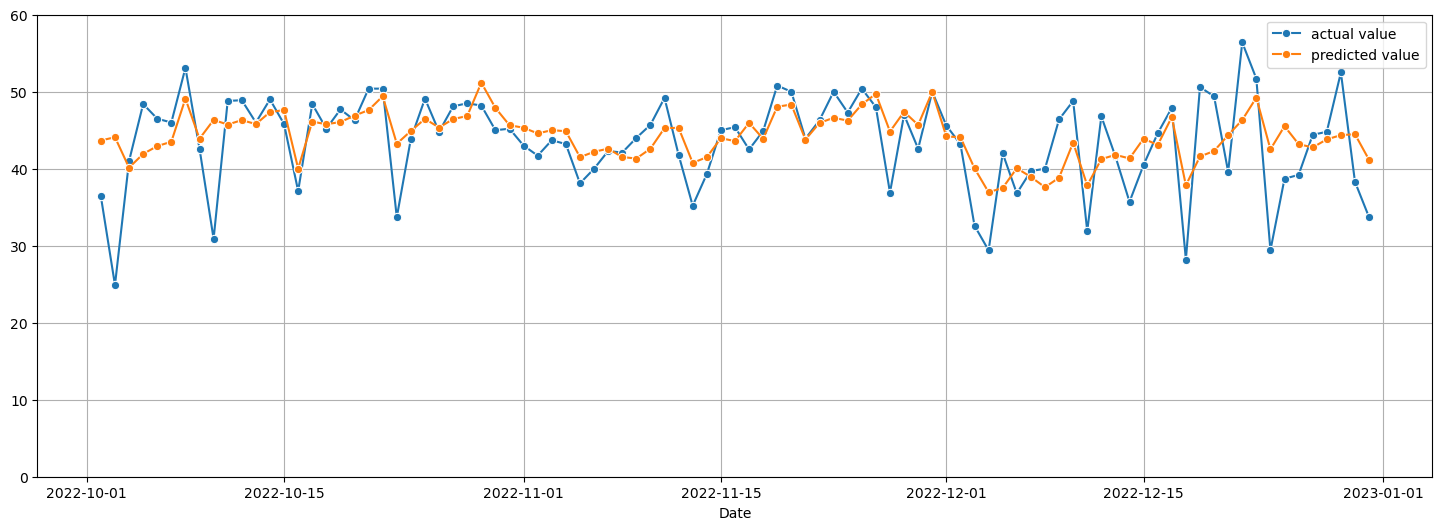

In [729]:
pred_plot(y_test, y_pred, y_test.index)

In [730]:
result['Ridge'] = mean_absolute_percentage_error(y_test, y_pred)
result_r2['Ridge'] = r2_score(y_test, y_pred)

#### 3) 모델3

In [731]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model3 = LinearRegression()
model3.fit(x_train, y_train)

LinearRegression()

In [732]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
y_pred = model3.predict(x_test)
evaluation(y_test, y_pred)

MAE:  3.6014723303175527
MAPE:  0.09338310008227779


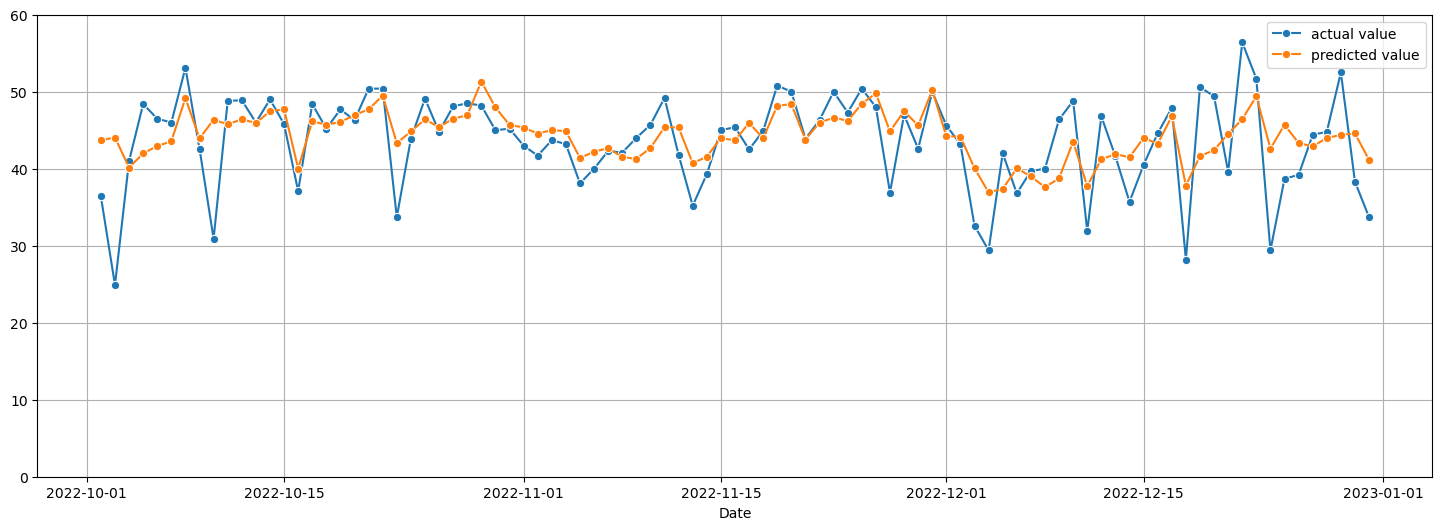

In [733]:
pred_plot(y_test, y_pred, y_test.index)

In [734]:
result['Linear Regression'] = mean_absolute_percentage_error(y_test, y_pred)
result_r2['Linear Regression'] = r2_score(y_test, y_pred)

#### 4) 모델4

In [735]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model4 = SVR()
model4.fit(x_train, y_train)

SVR()

In [736]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
y_pred = model4.predict(x_test)
evaluation(y_test, y_pred)

MAE:  3.6299735127096198
MAPE:  0.09342845633545732


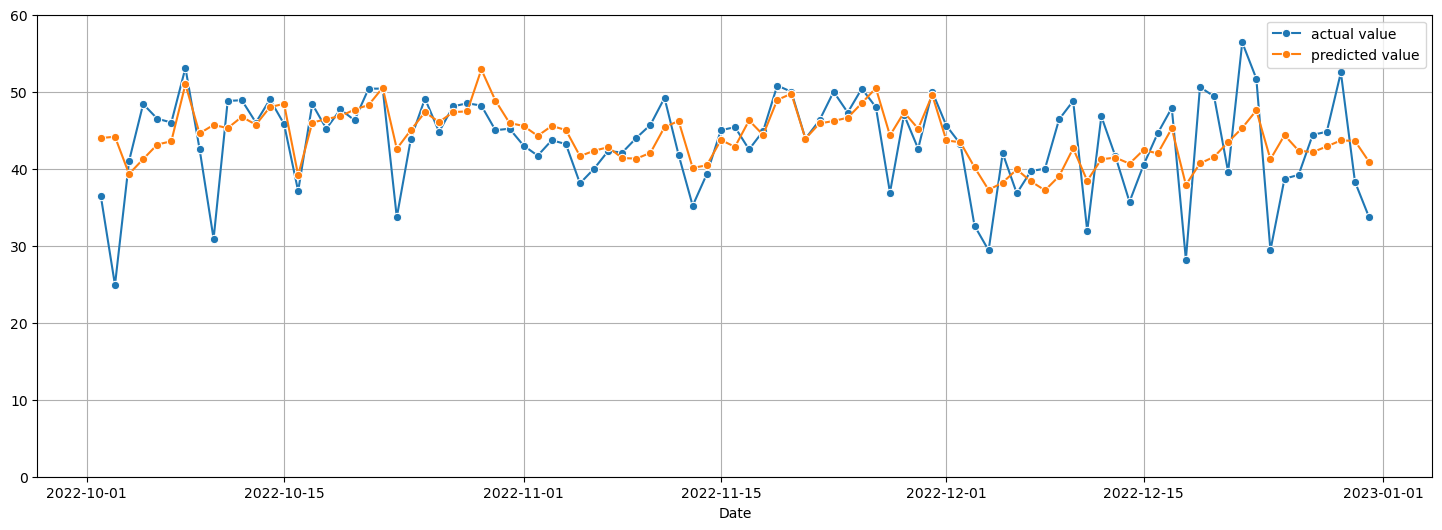

In [737]:
pred_plot(y_test, y_pred, y_test.index)

In [738]:
result['SVR'] = mean_absolute_percentage_error(y_test, y_pred)
result_r2['SVR'] = r2_score(y_test, y_pred)

### 5) 모델5

In [739]:
model5 = RandomForestRegressor(random_state=1, max_depth=5)
model5.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=1)

In [740]:
y_pred = model5.predict(x_test)
evaluation(y_test, y_pred)

MAE:  3.6089518341159033
MAPE:  0.09374124461730561


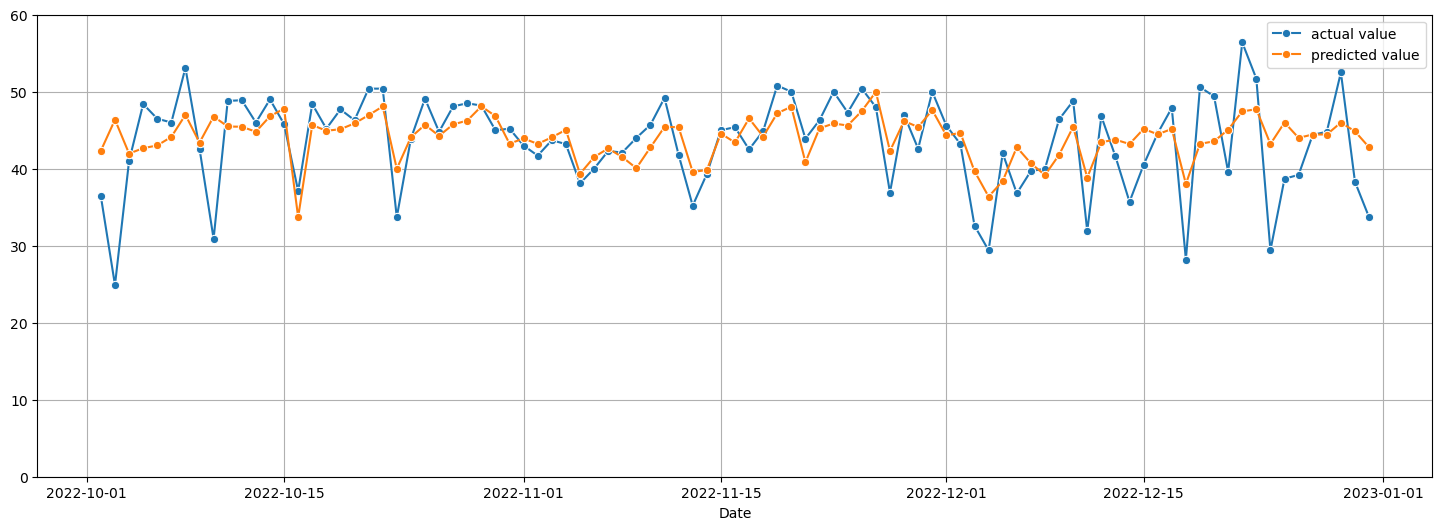

In [741]:
pred_plot(y_test, y_pred, y_test.index)

In [742]:
result['Random Forest'] = mean_absolute_percentage_error(y_test, y_pred)
result_r2['Random Forest'] = r2_score(y_test, y_pred)

### 6) 모델 6

In [743]:
model6 = XGBRegressor(random_state=1, max_depth=5)
model6.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [744]:
y_pred = model6.predict(x_test)
evaluation(y_test, y_pred)

MAE:  4.079663278768351
MAPE:  0.1042024131099843


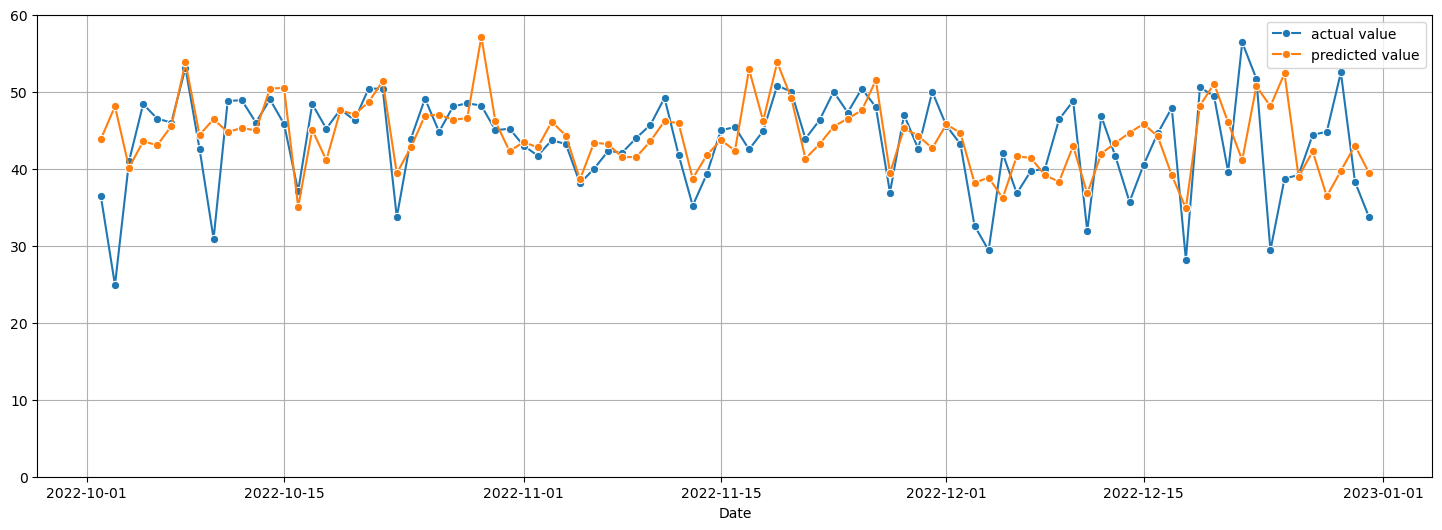

In [745]:
pred_plot(y_test, y_pred, y_test.index)

In [746]:
result['XGB'] = mean_absolute_percentage_error(y_test, y_pred)
result_r2['XGB'] = r2_score(y_test, y_pred)

### 7) 모델7

In [747]:
model7 = LGBMRegressor(random_state=1, verbose=-1, max_depth=5)
model7.fit(x_train, y_train)

LGBMRegressor(max_depth=5, random_state=1, verbose=-1)

In [748]:
y_pred = model7.predict(x_test)

In [749]:
evaluation(y_test, y_pred)

MAE:  3.8066701344588743
MAPE:  0.09736683961127562


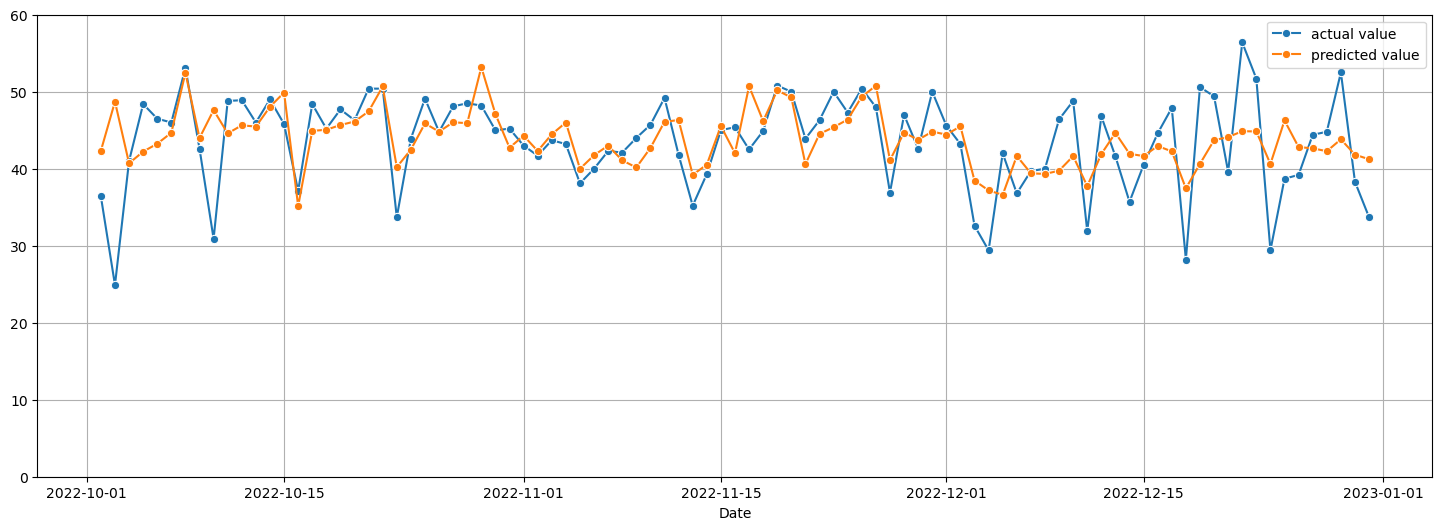

In [750]:
pred_plot(y_test, y_pred, y_test.index)

In [751]:
result['LGBM'] = mean_absolute_percentage_error(y_test, y_pred)
result_r2['LGBM'] = r2_score(y_test, y_pred)

### 8) 모델8

In [752]:
model8 = DecisionTreeRegressor(random_state=1, max_depth=5)
model8.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [753]:
y_pred = model8.predict(x_test)

In [754]:
evaluation(y_test, y_pred)

MAE:  4.192887659099501
MAPE:  0.10650010067162408


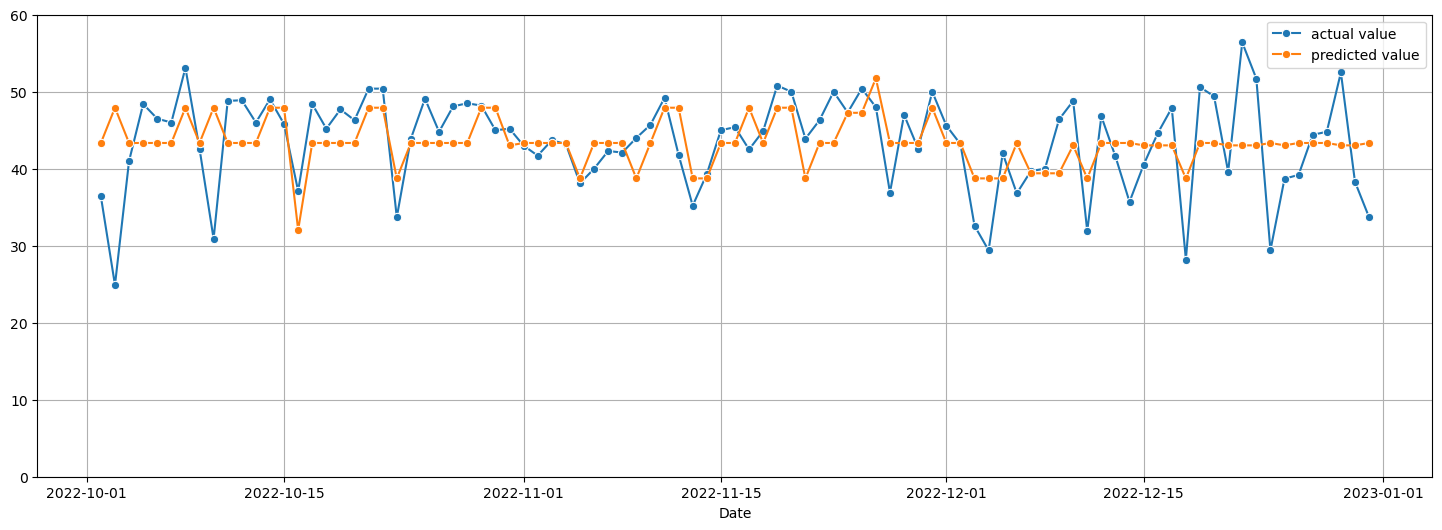

In [755]:
pred_plot(y_test, y_pred, y_test.index)

In [756]:
result['Decision Tree'] = mean_absolute_percentage_error(y_test, y_pred)

In [757]:
result_r2['Decision Tree'] = r2_score(y_test, y_pred)

## 3.모델별 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [758]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(5))
print('=' * 40)

Lasso 0.11594
Ridge 0.09351
Linear Regression 0.09338
SVR 0.09343
Random Forest 0.09374
XGB 0.1042
LGBM 0.09737
Decision Tree 0.1065


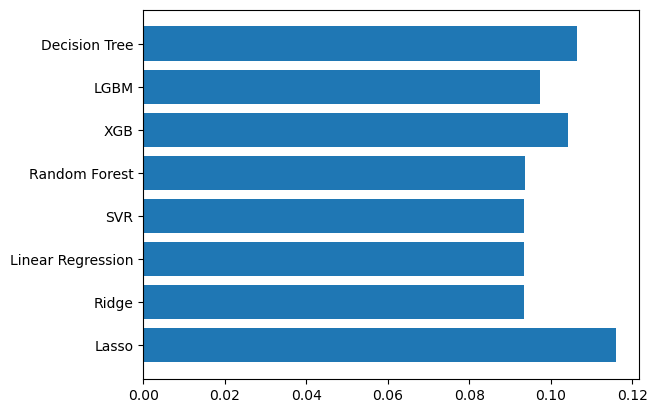

In [759]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.barh(list(result), result.values())
plt.show()


In [760]:
print('=' * 40)
for m_name, score in result_r2.items():
    print(m_name, score.round(5))
print('=' * 40)

Lasso 0.05738
Ridge 0.33488
Linear Regression 0.33502
SVR 0.33504
Random Forest 0.32946
XGB 0.07881
LGBM 0.24918
Decision Tree 0.14972


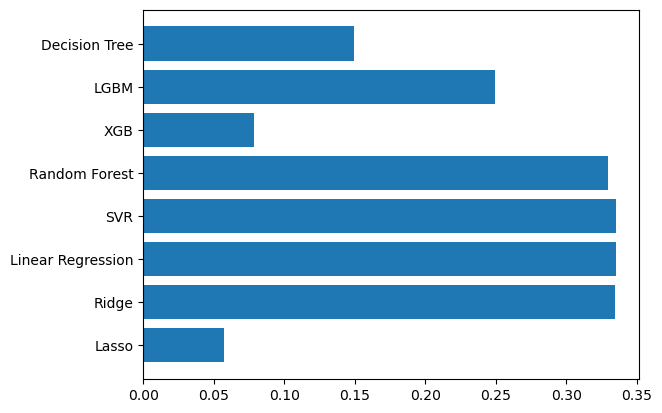

In [761]:
plt.barh(list(result_r2), result_r2.values())
plt.show()

## 4.모델 성능 튜닝

In [762]:
param_grid = {
    'kernel': ['linear', 'rbf'],  # Different types of kernels
    'C': [0.1, 1, 10],  # Penalty parameter C of the error term
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

In [763]:
svr = SVR()

In [764]:
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')


In [765]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_absolute_error')

In [766]:
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)

Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best estimator: SVR(C=10, gamma='auto')


In [767]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [768]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

MAE:  3.5603312802767815
MAPE:  0.09294814993602678


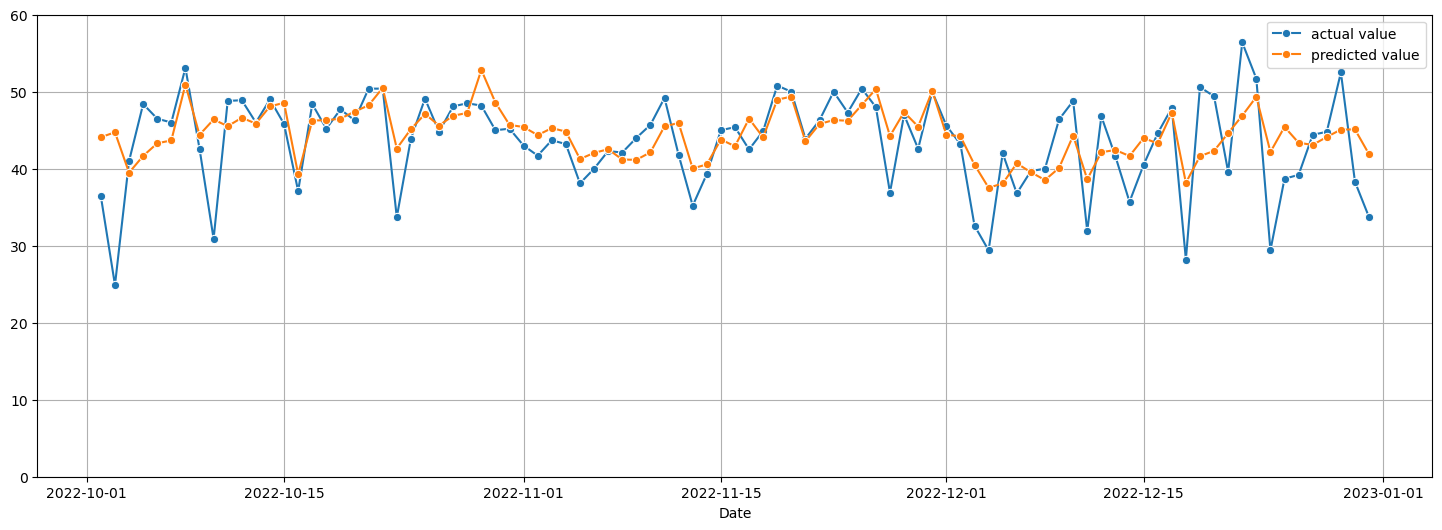

In [769]:
pred_plot(y_test, y_pred, y_test.index)

In [770]:
rf = RandomForestRegressor(random_state=1, max_depth=5)

In [771]:
param = {
    'max_depth': range(1, 7)
}

In [772]:
grid_rf = GridSearchCV(rf, param, cv=10,scoring='neg_mean_absolute_error')
grid_rf.fit(x_train, y_train)


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=5, random_state=1),
             param_grid={'max_depth': range(1, 7)},
             scoring='neg_mean_absolute_error')

In [773]:
print("Best parameters:", grid_rf.best_params_)
print("Best estimator:", grid_rf.best_estimator_)

Best parameters: {'max_depth': 6}
Best estimator: RandomForestRegressor(max_depth=6, random_state=1)


In [774]:
best_model_rf = grid_rf.best_estimator_
y_pred_rf = best_model_rf.predict(x_test)

In [775]:
print('MAE: ', mean_absolute_error(y_test, y_pred_rf))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred_rf))

MAE:  3.5390206178772963
MAPE:  0.09146375460520556


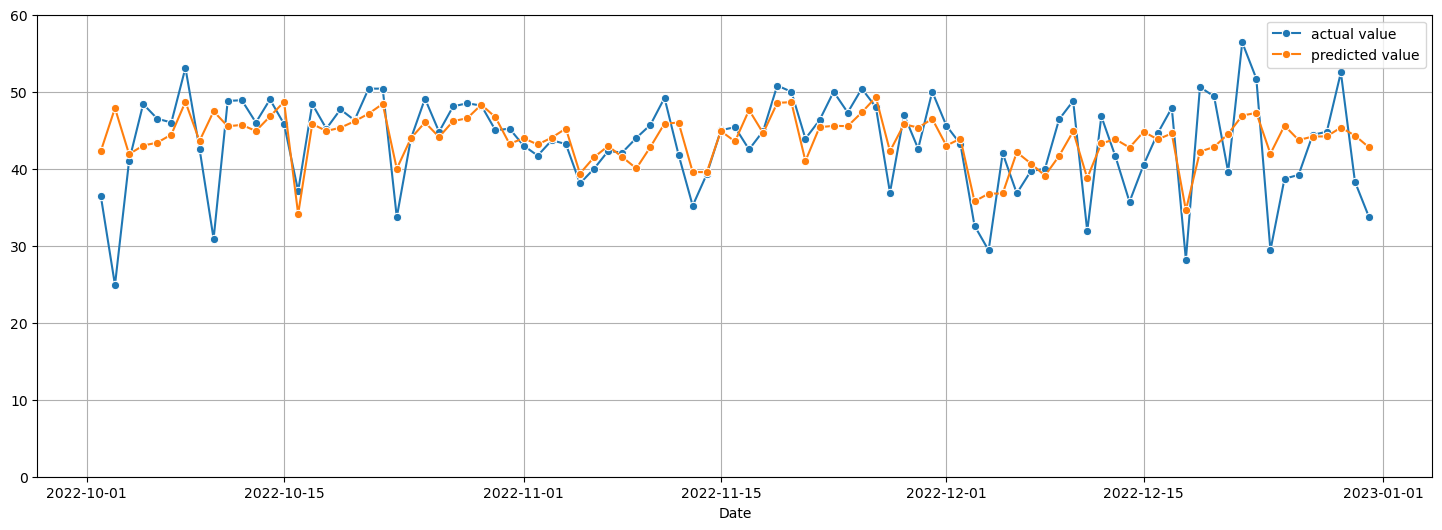

In [776]:
pred_plot(y_test, y_pred_rf, y_test.index)

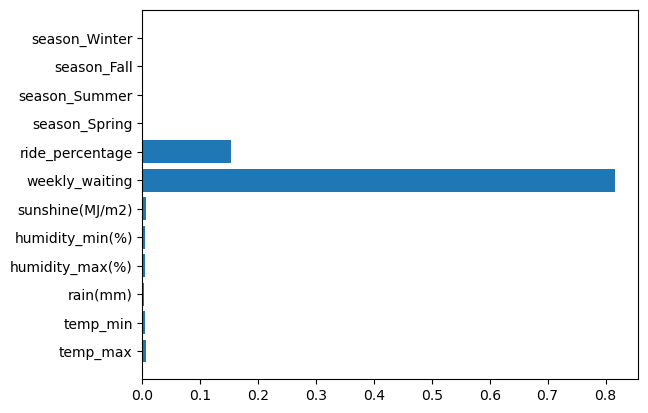

In [777]:
plt.barh(y=list(x), width=grid_rf.best_estimator_.feature_importances_)
plt.show()